# Bar Plots

## Two axes combined

In [44]:
# Install and load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb

In [45]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsCombineTwoAxes.dta?raw=true")

data2 = data[data.food_group.isin(['animal', 'fruit', 'grain', 'veg', 'starch', 'processed_sugar'])]
data2.head(3)

,int1mo,food_group,consumed,number_group,total_exp
12,1,animal,0.295367,2.362934,656.340154
13,2,animal,0.211058,1.688462,465.187635
14,3,animal,0.200307,1.602459,359.065346


[]

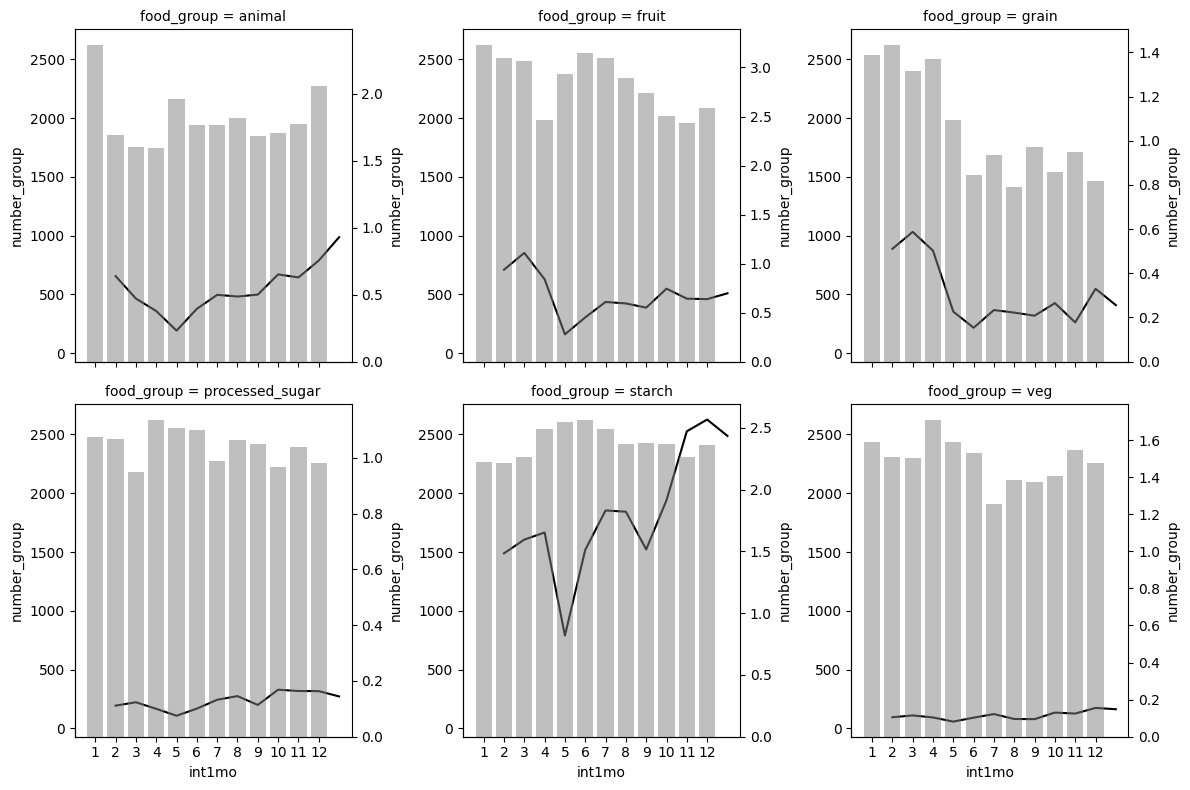

In [46]:
# Plot

def twin_barplot(x,y,color, alpha, **kwargs):
    ax = plt.twinx()
    sns.barplot(x=x,y=y,color=color,alpha = alpha, **kwargs, ax=ax)


g2 = sns.FacetGrid(data2, col = "food_group", height=4, col_wrap=3)

g2.map(sns.lineplot, "int1mo", "total_exp", color = 'black')

g2.map(twin_barplot, "int1mo", "number_group", color = 'grey', alpha = 0.5)

plt.plot()


## Multiple variables

In [47]:
#Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsMultipleVariables.dta?raw=true")
data.head(4)

,hh_id,round,w_Main_Paddy_Prod,w_Upland_Paddy_Prod,w_Spring_Winter_Maize_Prod,w_Summer_Maize_Prod,w_Wheat_Prod,w_Spring_Winter_Potato_Prod,w_Summer_Potato_Prod,w_Millet_Prod,...,ml_w_Beans_Prod,bl_w_Soybeans_Prod,ml_w_Soybeans_Prod,bl_w_Lentil_Prod,ml_w_Lentil_Prod,bl_w_Black_Gram_Prod,ml_w_Black_Gram_Prod,bl_w_Pea_Prod,ml_w_Pea_Prod,treatment_group
0,520209,2.0,379.293945,NaN,NaN,96.682770,53.299477,297.485443,NaN,44.622818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,520211,1.0,33.076530,NaN,NaN,130.238831,50.303890,150.911667,NaN,24.807398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,520224,1.0,64.793953,NaN,28.797314,71.993286,14.398657,100.790596,NaN,86.391937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,520224,2.0,41.327240,NaN,NaN,82.654480,18.597258,235.565277,NaN,24.796345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [48]:
# Collapse the dataset across each treatment group

data2= (data
       .groupby(['treatment_group'])
       .agg({'treatment_group':'mean', 
             'bl_w_Main_Paddy_Prod':'mean','ml_w_Main_Paddy_Prod':'mean', 
             'bl_w_Spring_Winter_Potato_Prod':'mean', 'ml_w_Spring_Winter_Potato_Prod':'mean',
             'bl_w_Summer_Maize_Prod':'mean', 'ml_w_Summer_Maize_Prod':'mean',
            }))

data2_reset=data2.reset_index(drop=True)


# Reshape data
data3 = pd.melt(data2_reset, id_vars=['treatment_group'])

cond = data3['variable'].str.contains('bl', case = False)
data3['name']= np.where(cond, 'bl', 'ml')

def change (q):
    variable = str(q['variable'])
    if variable == 'ml_w_Main_Paddy_Prod' or 'bl_w_Main_Paddy_Prod':
        if 'Main' in variable:
            return ('Main_Paddy_Prod')
        elif 'Potato' in variable:
            return ('Spring_Winter_Potato_Prod')
        elif 'Maize' in variable:
            return ('Summer_Maize_Prod')
    else:
        pass
data3["variable"] = data3.apply(change, axis=1)

data3['name.group'] = data3.name.astype(str).str.cat(data3[['treatment_group']].astype(str), sep = '.')
data3.head(4)

,treatment_group,variable,value,name,name.group
0,0.0,Main_Paddy_Prod,98.144730,bl,bl.0.0
1,1.0,Main_Paddy_Prod,119.025169,bl,bl.1.0
2,0.0,Main_Paddy_Prod,127.181786,ml,ml.0.0
3,1.0,Main_Paddy_Prod,139.099319,ml,ml.1.0


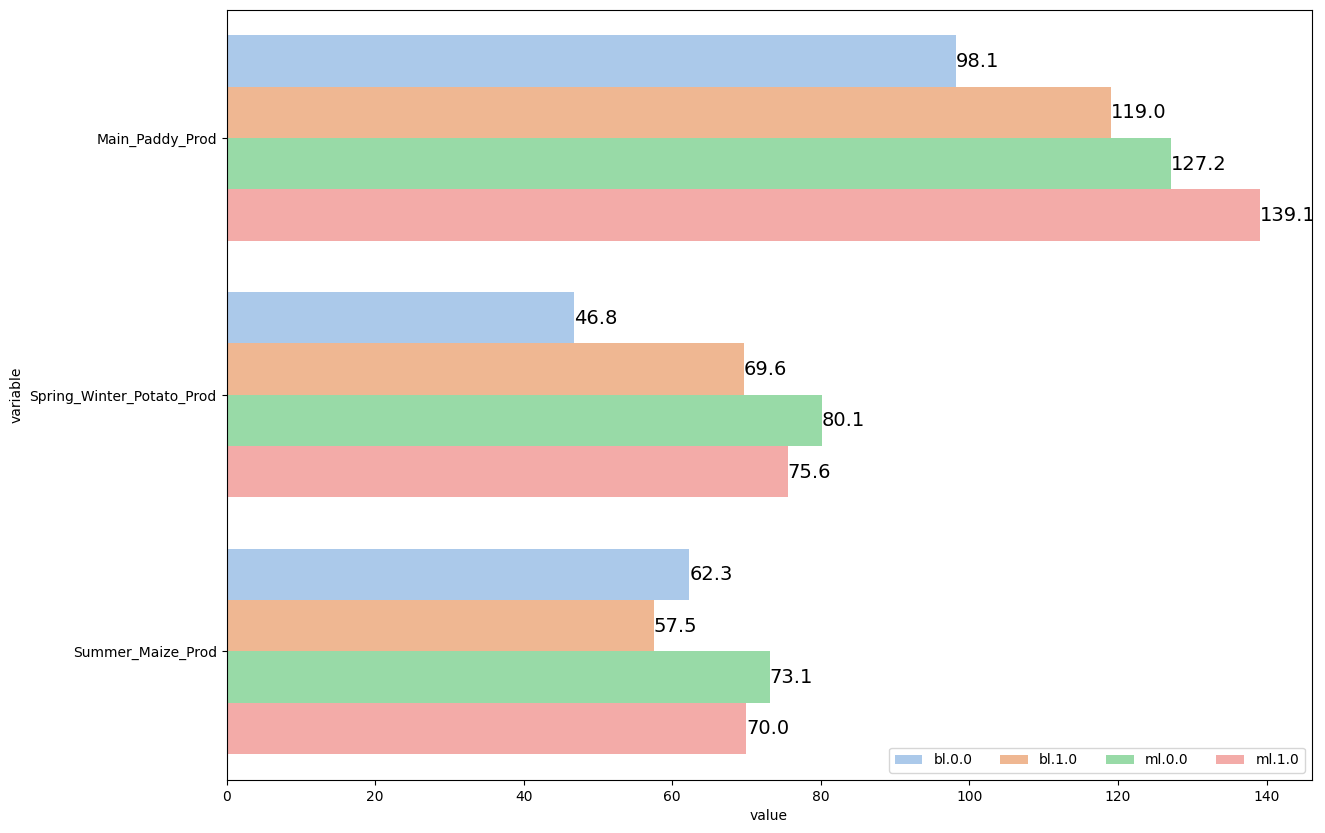

In [49]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data3, x = 'value', y = 'variable', hue = 'name.group', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 14)

plt.legend(loc="lower right", ncol = len(ax.lines))
plt.show()


## Two variables

In [50]:
# Load an example dataset 

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsTwoVariables.dta?raw=true")
data

,study,case,type,treat_correct
0,China,Tuberculosis (AFB or CXR),Standardized Patient,0.322097
1,China,Tuberculosis (AFB or CXR),Vignette,0.764045
2,Delhi,Tuberculosis (AFB or CXR),Standardized Patient,0.130435
3,Delhi,Tuberculosis (AFB or CXR),Vignette,0.724638
4,Bihar,Diarrhea (ORS),Vignette,0.785000
5,Bihar,Diarrhea (ORS),Standardized Patient,0.208000


In [51]:
# Construct an interaction 

data['sc'] = data.study.astype(str).str.cat(data[['case']].astype(str), sep = '.')
data


,study,case,type,treat_correct,sc
0,China,Tuberculosis (AFB or CXR),Standardized Patient,0.322097,China.Tuberculosis (AFB or CXR)
1,China,Tuberculosis (AFB or CXR),Vignette,0.764045,China.Tuberculosis (AFB or CXR)
2,Delhi,Tuberculosis (AFB or CXR),Standardized Patient,0.130435,Delhi.Tuberculosis (AFB or CXR)
3,Delhi,Tuberculosis (AFB or CXR),Vignette,0.724638,Delhi.Tuberculosis (AFB or CXR)
4,Bihar,Diarrhea (ORS),Vignette,0.785000,Bihar.Diarrhea (ORS)
5,Bihar,Diarrhea (ORS),Standardized Patient,0.208000,Bihar.Diarrhea (ORS)


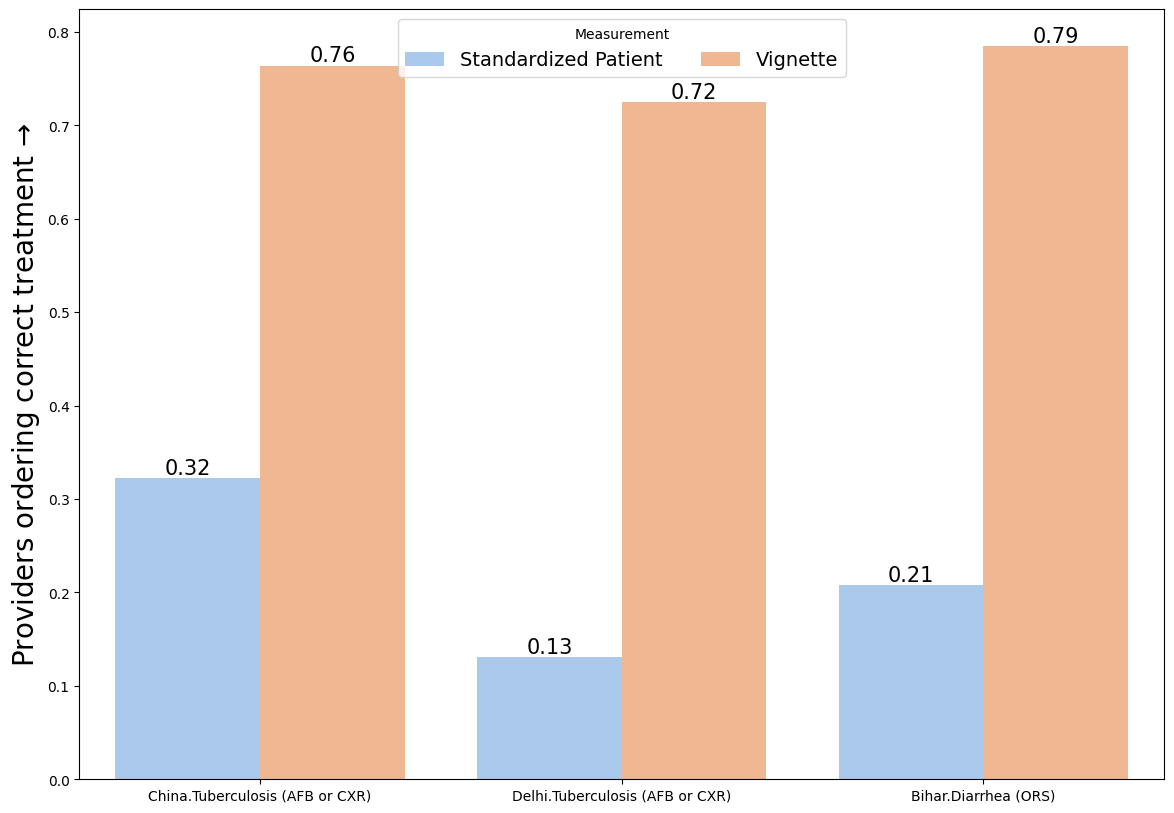

In [52]:
# Plot 

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data, x = 'sc', y = 'treat_correct', hue = 'type', palette = 'pastel')

plt.ylabel('Providers ordering correct treatment $→$', fontsize=20)
plt.xlabel('', fontsize=20)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 15)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 15)

plt.legend(title = 'Measurement', loc="upper center", ncol = len(ax.lines), fontsize=14)
plt.show()


## Horizontal multiple variables

In [53]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarMultipleVars.dta?raw=true")
data.head(3)

,study,facilitycode,case,as_correct,as_h1,as_h2,as_h6,as_h7,as_h8,as_h12,...,kenya_fac_qual_code_2,kenya_fac_qual_code_3,price_kenya,facility_private,checklist_essential,sp_roster_age,sp_roster_bmi,sp_roster_bp,sp_roster_bp_sys,sp_roster_male
0,Kenya,9052302,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,230.0,Private,0.500,31,32.038578,130/80,130,Female
1,Kenya,9012207,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,Private,0.625,31,32.038578,130/80,130,Female
2,Kenya,9052301,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,400.0,Private,0.125,31,32.038578,130/80,130,Female


In [54]:
# Collapse the dataset across each treatment group

data['refer'] = data['refer'].map({'No': 0, 'Yes': 1})
data[["refer"]] = data[["refer"]].apply(pd.to_numeric)
data['med_class_any_16'] = data['med_class_any_16'].map({'No': 0, 'Steroids': 1})
data[["med_class_any_16"]] = data[["med_class_any_16"]].apply(pd.to_numeric)
data['med_class_any_6'] = data['med_class_any_6'].map({'No': 0, 'Antibiotics': 1})
data[["med_class_any_6"]] = data[["med_class_any_6"]].apply(pd.to_numeric)
data[["med_any"]] = data[["med_any"]].apply(pd.to_numeric)

data2= (data
       .groupby(['facility_type'])
       .agg({'facility_type':'first','as_correct':'mean','ch_correct': 'mean','cp_correct' : 'mean',
             'tb_correct': 'mean', 'med_any': 'mean',
            'checklist': 'mean', 'refer': 'mean', 
            'med_any':'mean', 'med_class_any_6': 'mean',
            'med_class_any_16': 'mean'}))

data2_reset=data2.reset_index(drop=True)


# Reshape data
data3 = pd.melt(data2_reset, id_vars=['facility_type'], value_vars=['as_correct', 'ch_correct', 'cp_correct', 'tb_correct','med_any','checklist','refer','med_class_any_6','med_class_any_16'])

data3["variable"] = data3["variable"].astype("category")
data3["variable"] = data3["variable"].cat.rename_categories(["Asthma: Inhaler/Bronchodilator",
                                                           "Child Diarrhoea: ORS",
                                                             "Checklist",
                                                           "Chest Pain: Referral/Aspirin/ECG",
                                                             "Any medication",
                                                             "Steroids",
                                                             "Antibiotics",
                                                             "Referred (non-diarrhea)",
                                                           "Tuberculosis: AFB Smear"])
data3.head(4)


,facility_type,variable,value
0,Public,Asthma: Inhaler/Bronchodilator,0.785714
1,Private For-Profit,Asthma: Inhaler/Bronchodilator,0.833333
2,Private FBO/SFO,Asthma: Inhaler/Bronchodilator,0.800000
3,Public,Child Diarrhoea: ORS,0.615385


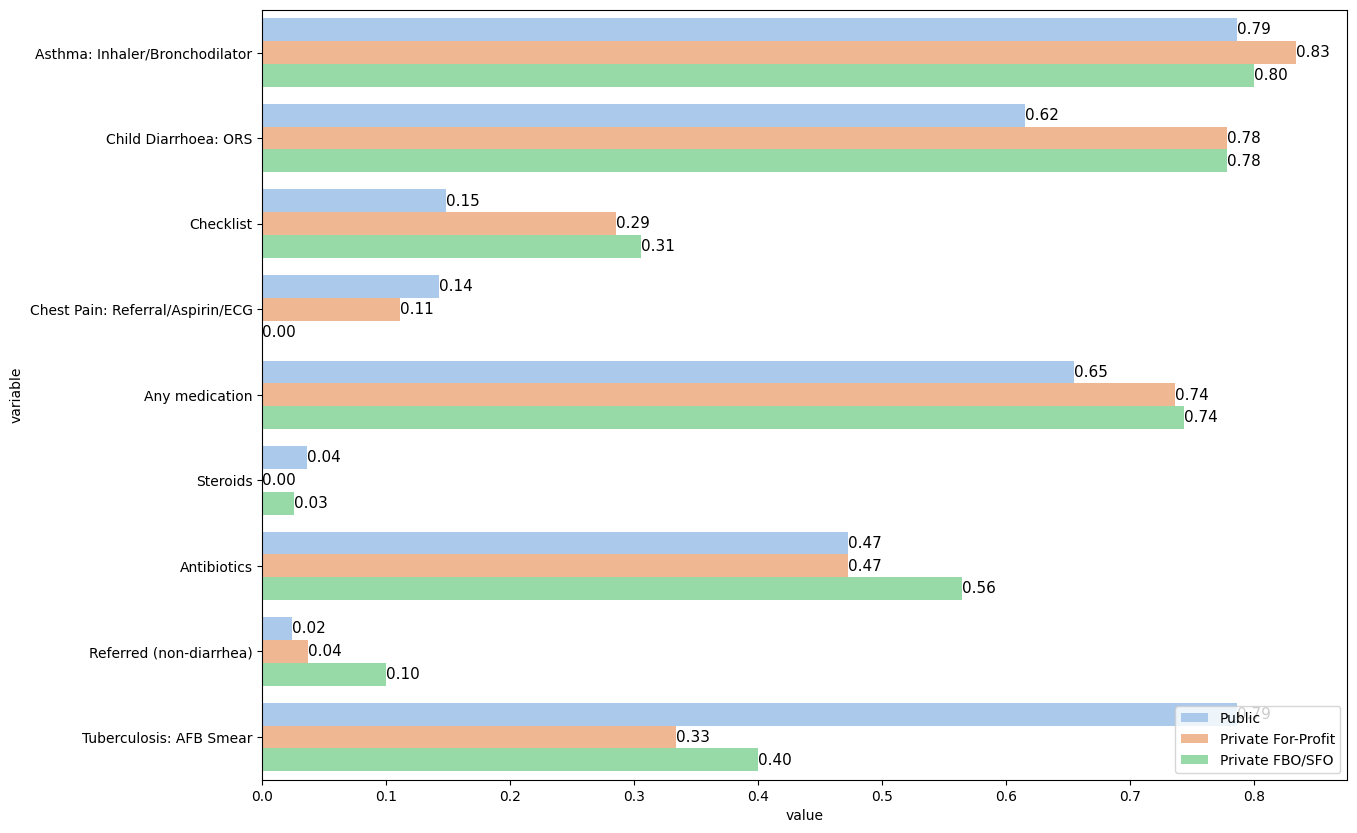

In [55]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data3, x = 'value', y = 'variable', hue = 'facility_type', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11)

plt.legend(loc="lower right")
plt.show()


## Decreasing order

In [56]:
# Load example datasets 

data = wb.data.DataFrame('NY.GDP.PCAP.KD', time = 2018)
country_code = wb.economy.DataFrame()

data2 = pd.concat([data, country_code], axis=1)
data2.head(4)

,NY.GDP.PCAP.KD,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
ABW,30536.667193,Aruba,False,-70.0167,12.5167,LCN,,LNX,HIC,Oranjestad
AFE,1544.077975,Africa Eastern and Southern,True,NaN,NaN,,,,,
AFG,546.743010,Afghanistan,False,69.1761,34.5228,SAS,SAS,IDX,LIC,Kabul
AFW,1843.554695,Africa Western and Central,True,NaN,NaN,,,,,


In [57]:
data3 = data2[data2['aggregate'] == False]

data4 = data3.nsmallest(30, 'NY.GDP.PCAP.KD', keep = 'all')
data4.head(4)

,NY.GDP.PCAP.KD,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
BDI,281.934732,Burundi,False,29.3639,-3.37840,SSF,SSA,IDX,LIC,Bujumbura
MWI,390.840707,Malawi,False,33.7703,-13.98990,SSF,SSA,IDX,LIC,Lilongwe
CAF,412.990203,Central African Republic,False,21.6407,5.63056,SSF,SSA,IDX,LIC,Bangui
SOM,425.416599,Somalia,False,45.3254,2.07515,SSF,SSA,IDX,LIC,Mogadishu


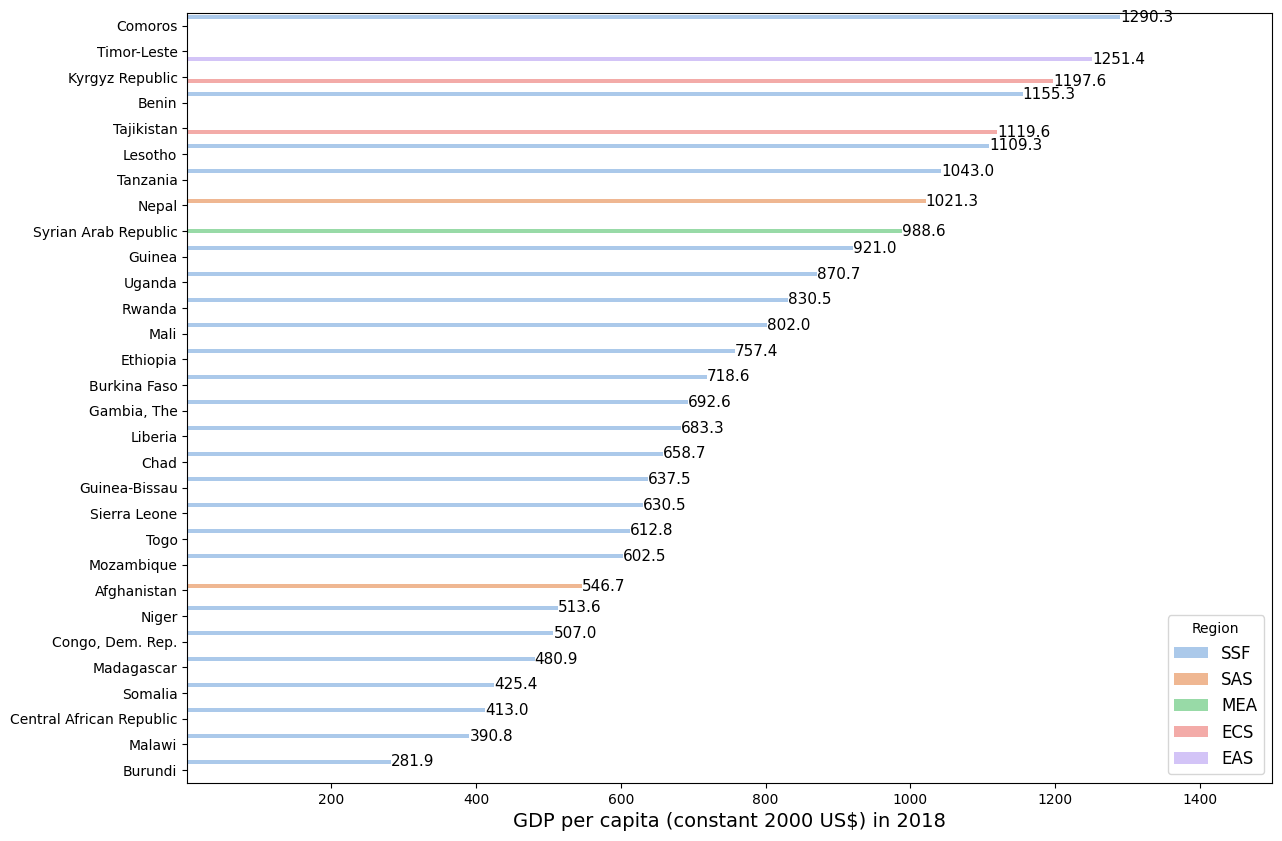

In [58]:
#Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data4, x = 'NY.GDP.PCAP.KD', y = 'name', hue = 'region', 
                 order=data4.sort_values('NY.GDP.PCAP.KD',ascending = False).name,
                palette='pastel')
plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[4], fmt='%.1f', fontsize = 11)

ax.set_xlim(1,1500)

plt.ylabel('')
plt.xlabel('GDP per capita (constant 2000 US$) in 2018', fontsize = 14)
plt.legend(title = 'Region', loc = "lower right", fontsize=12)
plt.show()

## Horizontal bar plot

In [59]:
#  Load example dataset

data1 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarPlot1.dta?raw=true")
data2 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarPlot2.dta?raw=true")

data = pd.concat([data2, data1], axis=0)
data.head(4)


,facilitycode,tottime,study,id,location_type,hours
0,BI_3503001,41.0,"Birbhum, India",NaN,NaN,NaN
1,BI_3503002,18.0,"Birbhum, India",NaN,NaN,NaN
2,BI_3503004,55.0,"Birbhum, India",NaN,NaN,NaN
3,BI_3503005,16.0,"Birbhum, India",NaN,NaN,NaN


In [60]:
# Collapse data

data4= (data1
       .groupby(['study'])
       .agg({'study':'first','hours':'mean'}))

data4

,study,hours
study,,
Vietnam Commune,Vietnam Commune,1.101324
Vietnam District,Vietnam District,2.831676


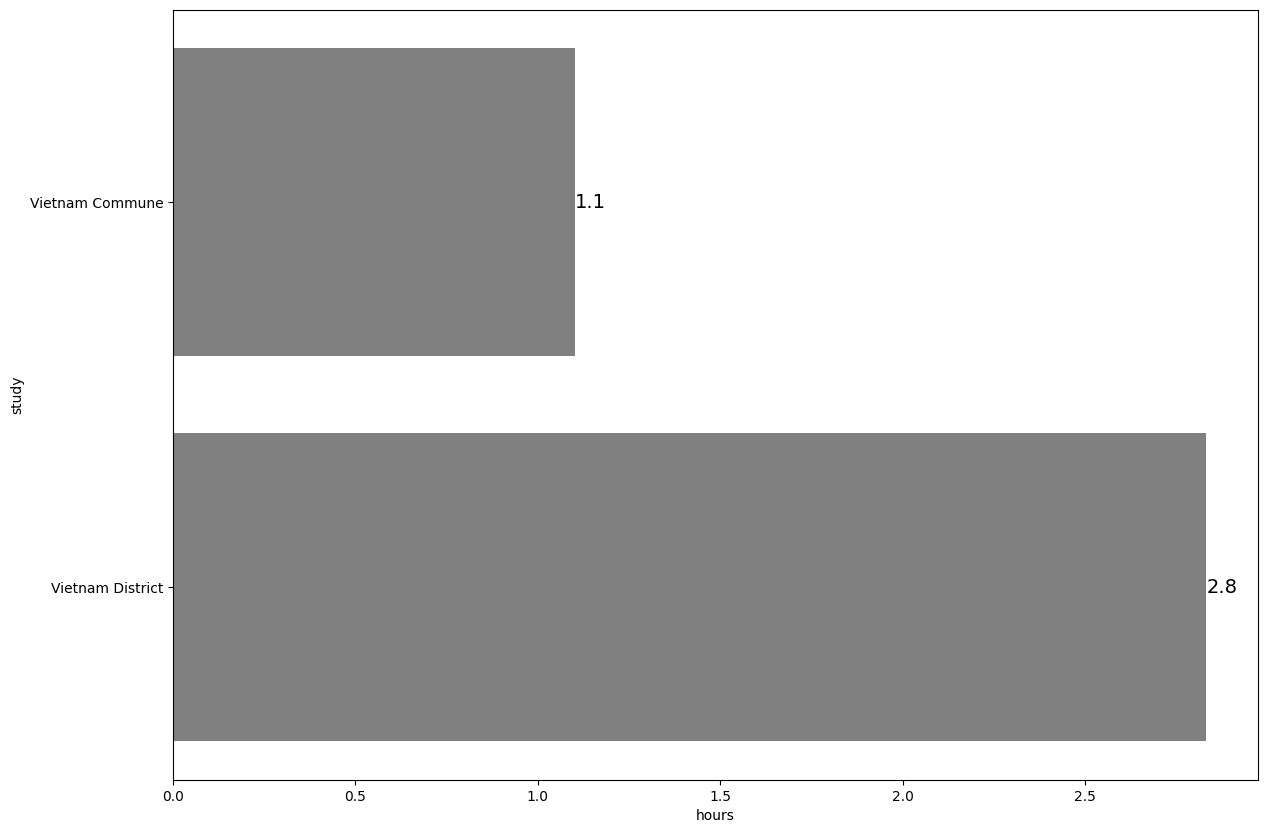

In [61]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data4, x = 'hours', y = 'study', color = 'grey')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)

plt.show()

## Horizontal decreasing order

In [62]:
# Load an example data set

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBetterbar.dta?raw=true")
data.head(4)

,sp_case,duration,patients_waiting_in,s4_tr1,s4_tr11,s5_referral,sp_id,pro_age,pro_male,sp1_e1,...,n_labs,cxr,sputum,dstgx,correct,q_mbbs,total_price,essential,sp_drugs_antibio_unlab,price_total_usd
0,SP1,6.850000,0,No,Yes,No,4,47,Male,No,...,3,1,0,0,1,1,451.000000,0.500000,1,7.2160
1,SP4,12.800000,0,No,Yes,No,15,47,Male,NaN,...,4,1,0,0,0,1,332.300018,0.416667,0,5.3168
2,SP1,6.316667,2,No,Yes,No,3,55,Male,No,...,0,0,0,0,0,1,146.000000,0.250000,1,2.3360
3,SP3,1.766667,0,No,Yes,No,13,55,Male,NaN,...,0,0,0,0,0,1,120.000000,0.000000,1,1.9200


In [63]:
# sp1_h{}
for i in range(1 , 22):
    no_yes = {'No': 0, 'Yes':1}
    sp = f"sp1_h{i}"
    if i != 6:
        data[sp] = data[sp].map(no_yes)
        data[[sp]] = data[[sp]].apply(pd.to_numeric)

for i in range(1 , 7):
    no_yes = {'No': 0, 'Yes':1}
    sp = f"sp1_e{i}"
    if i != 4:
        data[sp] = data[sp].map(no_yes)
        data[[sp]] = data[[sp]].apply(pd.to_numeric)


In [64]:
# Select data

data2 = data[["sp1_h1", "sp1_h2", "sp1_h3", "sp1_h4", "sp1_h5", "sp1_h7", "sp1_h8", 
              "sp1_h9", "sp1_h10", "sp1_h11", "sp1_h12", "sp1_h13", "sp1_h14", "sp1_h15",
              "sp1_h16", "sp1_h17", "sp1_h18", "sp1_h19", "sp1_h20", "sp1_h21", 
              "sp1_e1", "sp1_e2", "sp1_e3", "sp1_e5", "sp1_e6"]]


# Collapse data

data3= data2.agg(['mean'])


# Reshape data

data4 = pd.melt(data3, value_vars=["sp1_h1", "sp1_h2", "sp1_h3", "sp1_h4", "sp1_h5", "sp1_h7", "sp1_h8", 
              "sp1_h9", "sp1_h10", "sp1_h11", "sp1_h12", "sp1_h13", "sp1_h14", "sp1_h15",
              "sp1_h16", "sp1_h17", "sp1_h18", "sp1_h19", "sp1_h20", "sp1_h21", 
              "sp1_e1", "sp1_e2", "sp1_e3", "sp1_e5", "sp1_e6"])
data4.head(4)


,variable,value
0,sp1_h1,0.933333
1,sp1_h2,0.453333
2,sp1_h3,0.013333
3,sp1_h4,0.026667


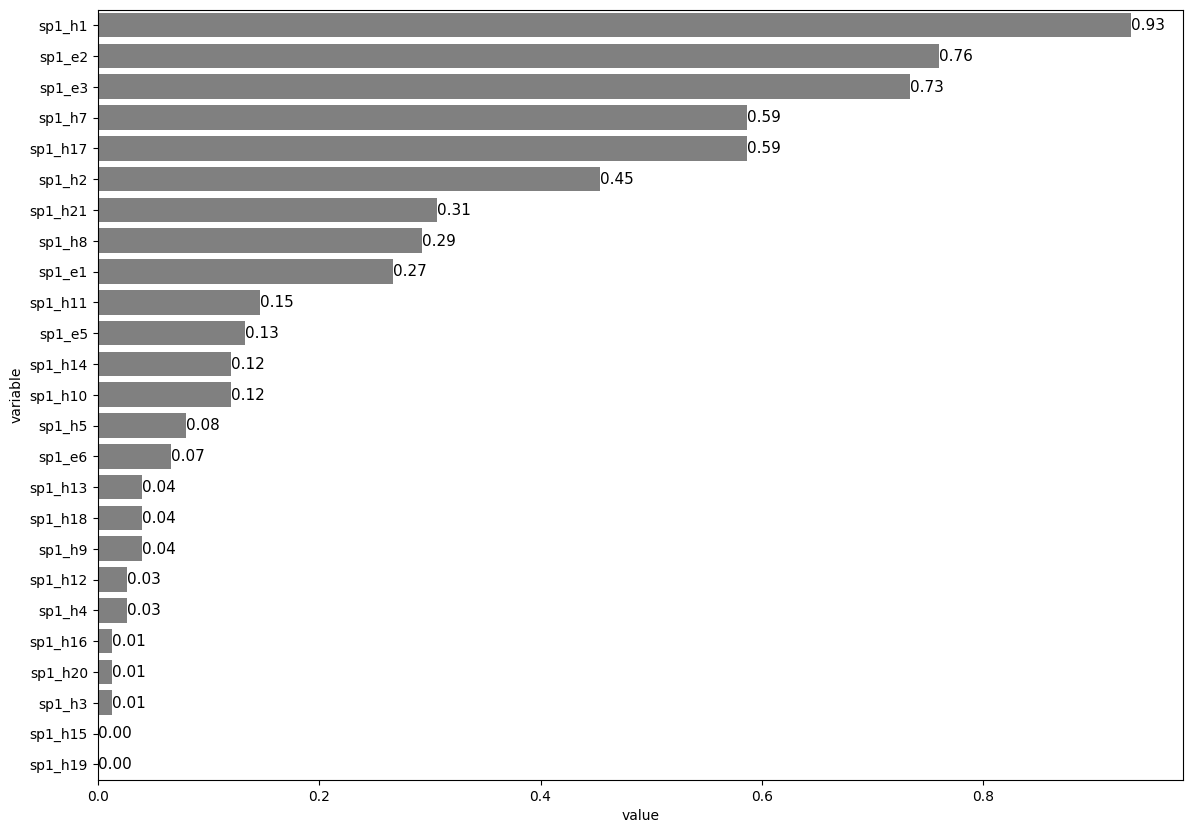

In [65]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data4, x = 'value', y = 'variable', color = 'grey',
                order=data4.sort_values('value',ascending = False).variable)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.show()

## Pre-defined error bars

In [66]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalGroupSE.dta?raw=true")
data

,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,correct_treatment,checklist_n,med_any,sp_code,city_patna,city_mumbai,city_delhi,id,case1,city
0,NaN,Case 2,1,Delhi,1,NaN,Yes,Referral,9050153,0.0,...,1,1,0,Rubi Kumari,1,0,1,1,1,Delhi
1,NaN,Case 1,0,Delhi,1,NaN,No,No Referral,9050153,0.0,...,0,0,1,Sudhir Kumar,1,0,1,1,1,Delhi
2,NaN,Case 2,1,Delhi,1,NaN,No,Referral,9050154,0.0,...,1,1,0,Rubi Kumari,1,0,1,2,1,Delhi
3,NaN,Case 1,1,Delhi,1,NaN,No,Referral,9050154,0.0,...,0,0,1,Sudhir Kumar,1,0,1,2,1,Delhi
4,NaN,Case 1,0,Delhi,1,NaN,No,No Referral,9050155,0.0,...,0,1,1,Sudhir Kumar,1,0,1,3,1,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,Case 1,0,Mumbai,3,0.500000,No,No Referral,QC9PN1005,NaN,...,0,0,1,Dananjay Kumar,1,1,0,620,1,Mumbai
1196,NaN,Case 1,0,Mumbai,3,0.416667,No,No Referral,QC9PN1006,NaN,...,0,0,1,Dananjay Kumar,1,1,0,621,1,Mumbai
1197,NaN,Case 2,0,Mumbai,3,1.733333,No,No Referral,QC9PN1006,NaN,...,0,1,1,Tej Bahadur,1,1,1,621,1,Mumbai
1198,NaN,Case 2,0,Mumbai,3,1.550000,No,No Referral,QC9PN1007,NaN,...,0,1,1,Tej Bahadur,1,1,1,622,1,Mumbai


In [67]:
data['dr_3'] = data['dr_3'].map({'No Referral': 0, 'Referral': 1})
data[["dr_3"]] = data[["dr_3"]].apply(pd.to_numeric)
data['med_b2_any_antibiotic'] = data['med_b2_any_antibiotic'].map({'No Antibiotic': 0, 'Gave Antibiotic': 1})
data[["med_b2_any_antibiotic"]] = data[["med_b2_any_antibiotic"]].apply(pd.to_numeric)
data['med_b2_any_steroid'] = data['med_b2_any_steroid'].map({'No Steroid': 0, 'Gave Steroid': 1})
data[["med_b2_any_steroid"]] = data[["med_b2_any_steroid"]].apply(pd.to_numeric)
data['med_l_any_2'] = data['med_l_any_2'].map({'No': 0, 'Fluoroquinolone': 1})
data[["med_l_any_2"]] = data[["med_l_any_2"]].apply(pd.to_numeric)
data['med_l_any_1'] = data['med_l_any_1'].map({'No': 0})
data[["med_l_any_1"]] = data[["med_l_any_1"]].apply(pd.to_numeric)


In [68]:
# Reshape and collapse data for means

data2= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'mean', 
             "correct_treatment":'mean', "med_b2_any_antibiotic":'mean', 
             "med_b2_any_steroid":'mean', "med_b2_any_antister":'mean', 
              "med_l_any_2":'mean', "med_b2_any_schedule_h":'mean', 
             "med_b2_any_schedule_h1":'mean', "med_b2_any_schedule_x":'mean', 
             "med_l_any_1":'mean'}))

data2_2 = pd.melt(data2, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data2_2.rename(columns={'value': 'mean'}, inplace=True)


# Reshape and collapse data for error bars

data3= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'sem', 
             "correct_treatment":'sem', "med_b2_any_antibiotic":'sem', 
             "med_b2_any_steroid":'sem', "med_b2_any_antister":'sem', 
              "med_l_any_2":'sem', "med_b2_any_schedule_h":'sem', 
             "med_b2_any_schedule_h1":'sem', "med_b2_any_schedule_x":'sem', 
             "med_l_any_1":'sem'}))

data3_2 = pd.melt(data3, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data3_2.rename(columns={'value': 'sem', 'city': 'city2', 'variable': 'variable2'}, inplace=True)


# Concat datas

dataf = pd.concat([data2_2, data3_2], axis=1)
dataf.head(4)


,city,variable,mean,city2,variable2,sem
0,Delhi,dr_3,0.576923,Delhi,dr_3,0.048680
1,Mumbai,dr_3,0.372483,Mumbai,dr_3,0.019820
2,Patna,dr_3,0.430000,Patna,dr_3,0.022163
3,Delhi,correct_treatment,0.509615,Delhi,correct_treatment,0.049257


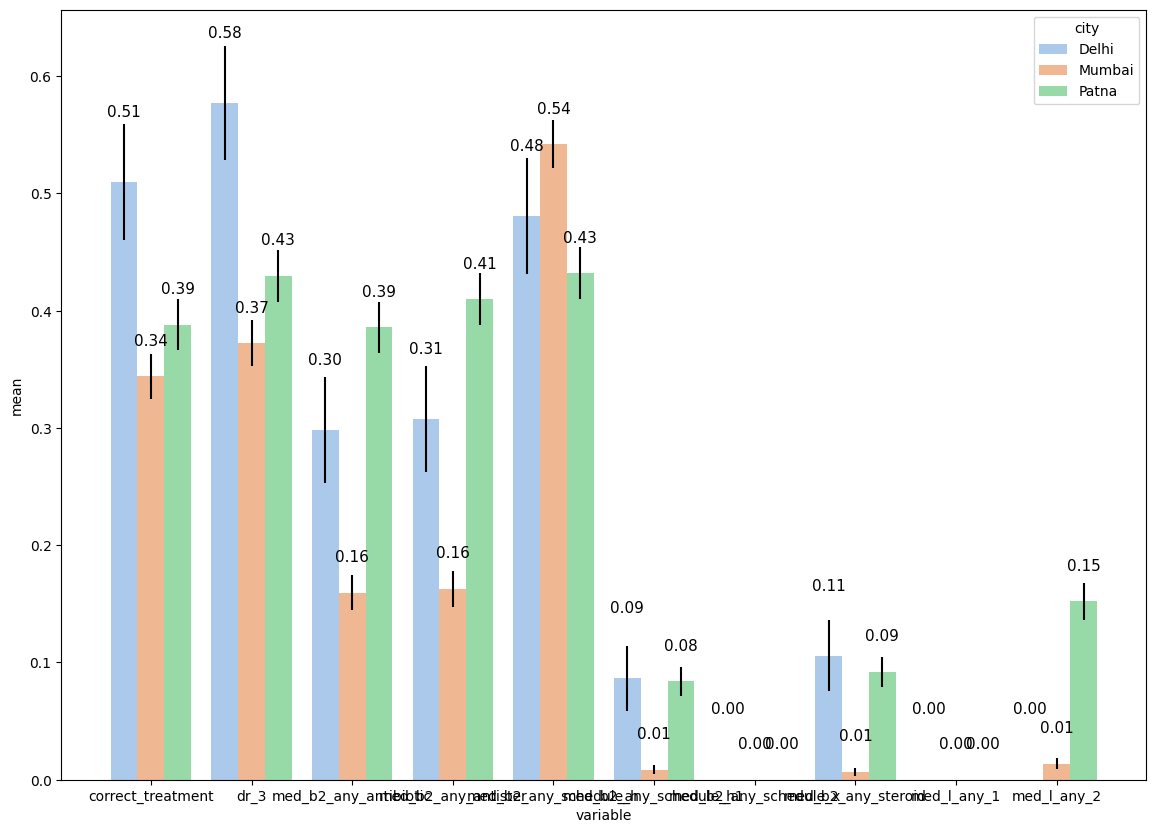

In [69]:
# Plot

dataf = dataf.sort_values(['city', 'variable'])
plt.figure(figsize=(14,10))

ax = sns.barplot(data=dataf, x = 'variable', y ='mean', hue ='city', palette = 'pastel')

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=dataf["sem"], fmt="none", c="k")

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11, padding=45)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11, padding=20)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11, padding=20)

plt.show()


## Stacked

In [70]:
# Load an example data set

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/StackBarGraphs.dta?raw=true")
data.head(3)

,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,city_delhi,id,case1,n,checkgroup,med_b2_antister_cat_1,med_b2_antister_cat_2,med_b2_antister_cat_3,med_b2_antister_cat_4,med_b2_antister_cat_5
0,NaN,Case 2,1,DELHI,1,NaN,Yes,Referral,9050153,0.0,...,1,1,1,1.0,"""Case 2"" ""(401/601)""",No,No,No,No,Yes
1,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050153,0.0,...,1,1,1,1.0,"""Case 1"" ""(503/599)""",No,No,Yes,No,No
2,NaN,Case 2,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,1,2,1,1.0,"""Case 2"" ""(401/601)""",No,No,No,No,Yes


In [71]:
data['med_b2_antister_cat_1'] = data['med_b2_antister_cat_1'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_1"]] = data[["med_b2_antister_cat_1"]].apply(pd.to_numeric)

data['med_b2_antister_cat_2'] = data['med_b2_antister_cat_2'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_2"]] = data[["med_b2_antister_cat_2"]].apply(pd.to_numeric)

data['med_b2_antister_cat_3'] = data['med_b2_antister_cat_3'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_3"]] = data[["med_b2_antister_cat_3"]].apply(pd.to_numeric)

data['med_b2_antister_cat_4'] = data['med_b2_antister_cat_4'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_4"]] = data[["med_b2_antister_cat_4"]].apply(pd.to_numeric)

data['med_b2_antister_cat_5'] = data['med_b2_antister_cat_5'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_5"]] = data[["med_b2_antister_cat_5"]].apply(pd.to_numeric)

In [72]:
# Collapse data

data2= (data
       .groupby(['checkgroup'])
       .agg({'checkgroup': 'first','case':'first',
             'dr_3':'first', 'med_b2_antister_cat_1':'mean',
             'med_b2_antister_cat_2':'mean',
            'med_b2_antister_cat_3':'mean', 'med_b2_antister_cat_4':'mean', 
            'med_b2_antister_cat_5':'mean'}))

data2_reset=data2.reset_index(drop=True)


# Reshape data

data3 = pd.melt(data2_reset, id_vars=['checkgroup', 'dr_3', 'case'], value_vars=['dr_3','med_b2_antister_cat_1','med_b2_antister_cat_2', 
                                                                     'med_b2_antister_cat_3',
                                                                    'med_b2_antister_cat_4',
                                                                    'med_b2_antister_cat_5'])

data3["variable"] = data3["variable"].astype("category")
data3["variable"] = data3["variable"].cat.rename_categories(["No antibiotic or steroid",
                                                           "Steriod",
                                                           "Antibiotic",
                                                           "Antibiotic and steroid",
                                                           "No medication"])
data3.head(4)


,checkgroup,dr_3,case,variable,value
0,"""Case 1"" ""(503/599)""",No Referral,Case 1,No antibiotic or steroid,0.526839
1,"""Case 1"" ""(96/599)""",Referral,Case 1,No antibiotic or steroid,0.125000
2,"""Case 2"" ""(200/601)""",No Referral,Case 2,No antibiotic or steroid,0.485000
3,"""Case 2"" ""(401/601)""",Referral,Case 2,No antibiotic or steroid,0.139651


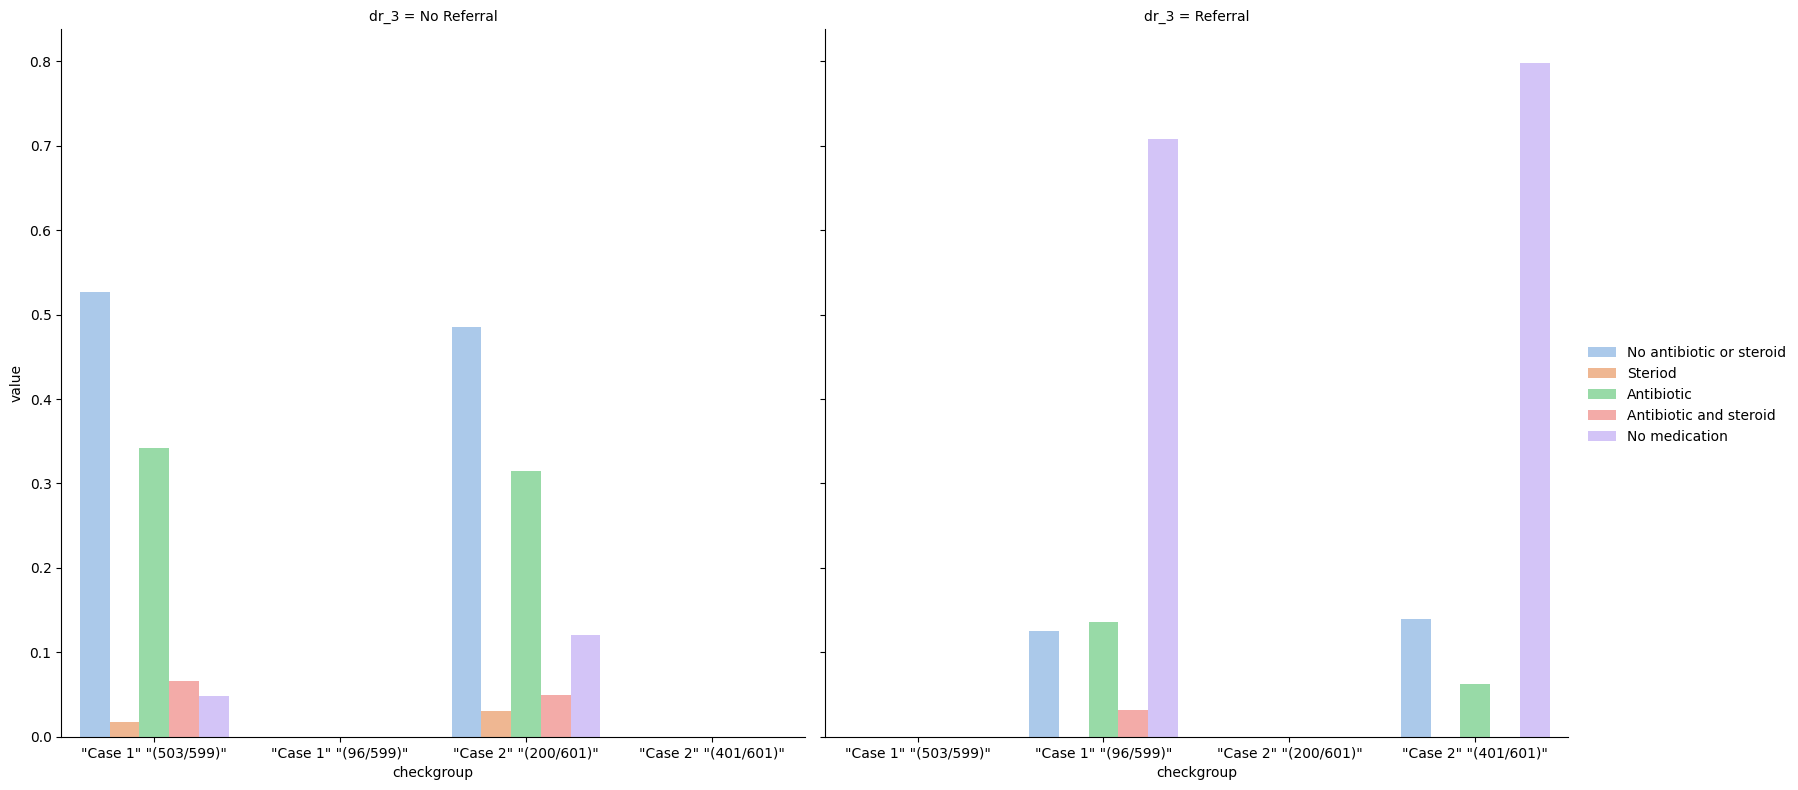

In [73]:
# Plot

g = sns.FacetGrid(data3, col = 'dr_3', height=8, sharex=False)
g = (g.map_dataframe(sns.barplot, x = 'checkgroup', y ='value', hue = 'variable', palette = 'pastel').add_legend())

plt.show()
